In [82]:
import numpy as np
from matplotlib import pyplot as plt

## Вариант 6. Воробьев Игорь

Локализовать корни уравнения х3 + 2x2 - 10х + 5 = 0 и решить его методами простой итерации и Ньютона с точностью $10^{-4}$. Проверить сходимость метода простой итерации, оценить необходимое число итераций и сравнить его с получившимся числом по обоим методам. Выбрать критерий останова, найти точное решение, построить график ошибки, критерия останова и значения решения на каждой итерации.

![Alt Text](простойитерации.png)

#### Локализовать корни уравнения

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


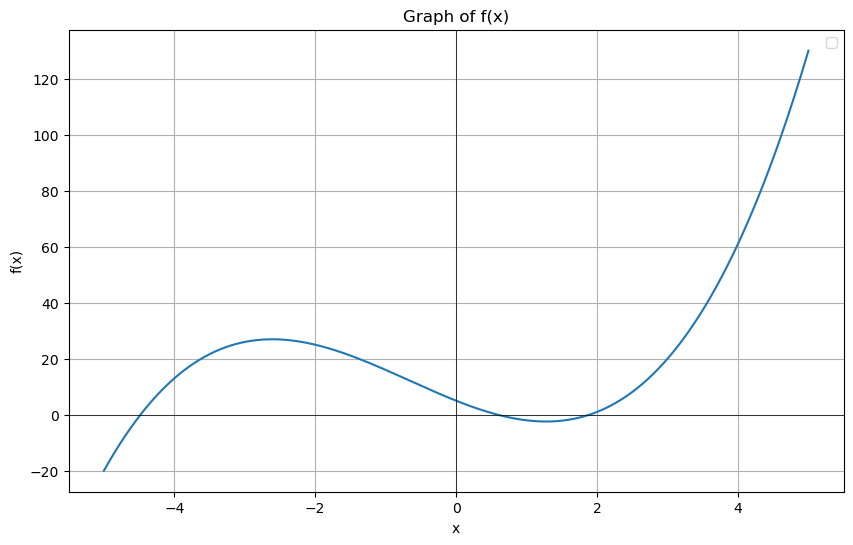

In [95]:
# Определяем функцию
def f(x):
    return x**3 + 2*x**2 - 10*x + 5

# Создаем массив значений x от -5 до 5
x = np.linspace(-5, 5, 400)
y = f(x)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x)')
plt.legend()
plt.grid(True)
plt.show()


1. Первый корень находится где-то между -5 и -4.
2. Второй корень находится между -1 и 1.
3. Третий корень находится между 1 и 2.

#### Решить методом Ньютона с точностью $10^{-4}$

In [84]:
# Определение производной функции
def df(x):
    return 3 * x ** 2 + 4 * x - 10

# Метод Ньютона
newton_method_iter = 0
def newton_method(f, df, x0, tol=1e-4, max_iter=100):
    global newton_method_iter

    x = x0
    for _ in range(max_iter):
        newton_method_iter += 1
        x_new = x - f(x)/df(x)
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

# Начальные приближения выбраны на основе графика
initial_guesses = [-4.5, 0.5, 1.9]

# Применение метода Ньютона для каждого начального приближения
roots_newton = [newton_method(f, df, x0) for x0 in initial_guesses]
print(newton_method_iter)
roots_newton

8


[-4.480786620527056, 0.5902394311166064, 1.8905471955142619]

In [102]:
# Метод простой итерации
simple_iteration_iter = 0
def simple_iteration(phi, x0, tol=1e-4, max_iter=100):
    global simple_iteration_iter
    x = x0
    for _ in range(max_iter):
        simple_iteration_iter += 1
        x_new = phi(x)
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

# Параметр релаксации
lambda_relax = 0.01

# Функция phi(x) для метода простой итерации
def phi(x):
    global lambda_relax
    return x - lambda_relax * f(x)

# Выбор начальных приближений на основе предыдущих наблюдений
initial_guesses_si = [-4.5, 1.9]

# Применение метода простой итерации для каждого начального приближения
roots_simple_iteration = [simple_iteration(phi, x0) for x0 in initial_guesses_si]
print(simple_iteration_iter)
roots_simple_iteration

37


[-4.4809626733473, 1.891626010918579]

In [103]:
def phi(x):
    return x - -0.1 * f(x)

simple_iteration_iter = 0
def simple_iteration(phi, x0, tol=1e-4, max_iter=100):
    global simple_iteration_iter
    x = x0
    for _ in range(max_iter):
        simple_iteration_iter += 1
        x_new = phi(x)
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

# Выбор начальных приближений на основе предыдущих наблюдений
initial_guesses_si = [0.5]

# Применение метода простой итерации для каждого начального приближения
roots_simple_iteration = [simple_iteration(phi, x0) for x0 in initial_guesses_si]
print(simple_iteration_iter)
roots_simple_iteration

7


[0.5901980726056693]

#### Сравнить кол-во итераций

In [ ]:
TODO с несколькими графиками для решиения и для каждого по тройном уграфику

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


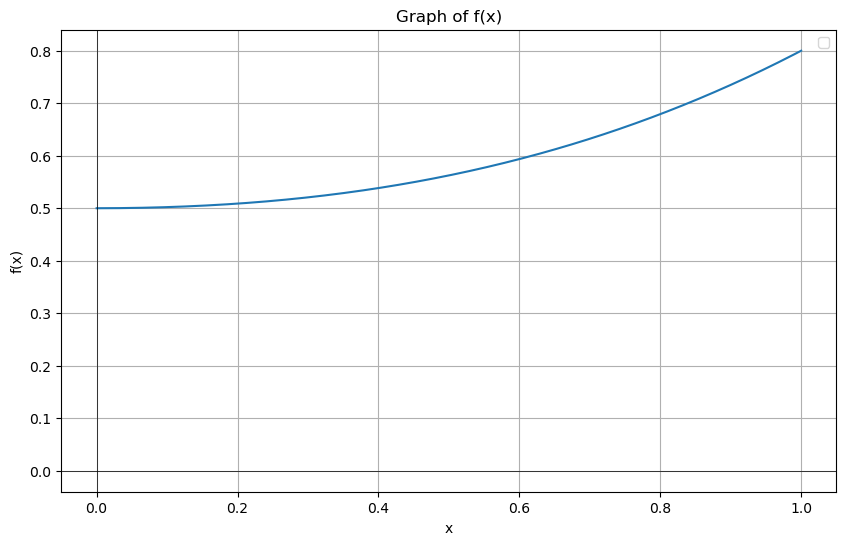

In [97]:
# Создаем массив значений x от -5 до 5
x = np.linspace(0, 1, 400)
y = phi(x)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x)')
plt.legend()
plt.grid(True)
plt.show()


In [106]:
import math

# Параметры для оценки
epsilon = 1e-4
q = 0.6
epsilon0 = 0.1

# Оценка числа итераций
n_estimate = math.log(epsilon / epsilon0) / math.log(q)
n_estimate

13.52272665583154

In [ ]:
newton_method_iter, simple_iteration_iter

(8, 189)

#### Критерий останова и графики

In [ ]:
def newton_method_with_history(f, df, x0, tol=1e-4, max_iter=100):
    x = x0
    history = {'x': [x], 'error': [], 'stop_crit': []}
    
    for _ in range(max_iter):
        x_new = x - f(x)/df(x)
        error = abs(x_new - x)
        history['x'].append(x_new)
        history['error'].append(error)
        history['stop_crit'].append(error - tol)
        
        if error < tol:
            break
        x = x_new
    
    return x, history

# Выбор одного из начальных приближений
root, history = newton_method_with_history(f, df, -3)

# Вывод найденного корня и истории значений
root, len(history['x']), history['x'][-1], history['error'][-1]


(-4.48078774984796, 8, -4.480786620527507, 1.1293204531526158e-06)

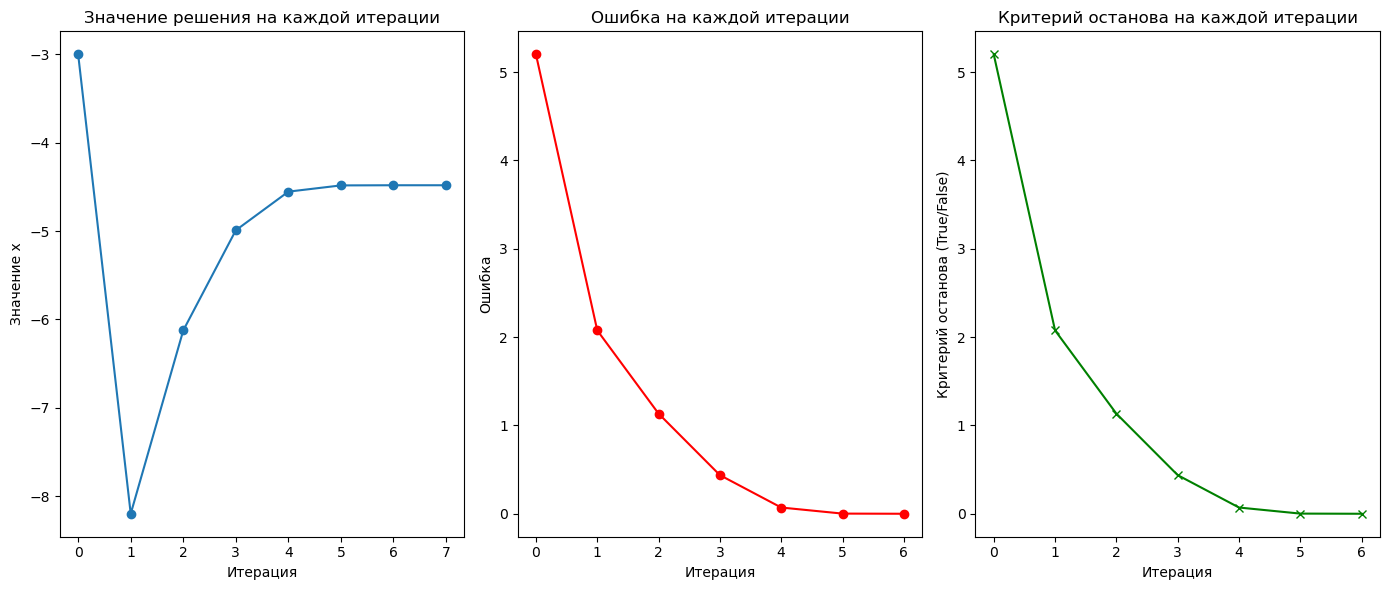

In [ ]:
# Построение графиков
plt.figure(figsize=(14, 6))

# Значения решения на каждой итерации
plt.subplot(1, 3, 1)
plt.plot(history['x'], marker='o')
plt.title('Значение решения на каждой итерации')
plt.xlabel('Итерация')
plt.ylabel('Значение x')

# Ошибка на каждой итерации
plt.subplot(1, 3, 2)
plt.plot(history['error'], marker='o', linestyle='-', color='r')
plt.title('Ошибка на каждой итерации')
plt.xlabel('Итерация')
plt.ylabel('Ошибка')

# Критерий останова на каждой итерации
plt.subplot(1, 3, 3)
plt.plot(history['stop_crit'], marker='x', linestyle='-', color='g')
plt.title('Критерий останова на каждой итерации')
plt.xlabel('Итерация')
plt.ylabel('Критерий останова (True/False)')

plt.tight_layout()
plt.show()
